****
## JSON exercise

Using data in file 'data/world_bank_projects.json'": https://www.springboard.com/static/project_files/data_wrangling_json.zip

1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

**Importing packages and loading data into dataframe: df**

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r'C:\\Users\Cristino\Dropbox\SpringBoard\JSON Wrangling\data_wrangling_json\data\world_bank_projects.json'
df = pd.read_json(path)
type(df)

pandas.core.frame.DataFrame

**Exploring data columns and dtypes.**

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

,approvalfy,grantamt,ibrdcommamt,idacommamt,lendprojectcost,totalamt,totalcommamt
count,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,2013.108000,4.432400e+06,3.286010e+07,3.542136e+07,1.547241e+08,6.828146e+07,7.271386e+07
std,0.722066,2.023307e+07,1.089197e+08,7.681431e+07,4.764211e+08,1.242662e+08,1.234705e+08
min,1999.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,0.000000e+00,3.000000e+04
25%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.472500e+06,0.000000e+00,5.000000e+06
50%,2013.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+07,2.000000e+07,2.500000e+07
75%,2013.000000,1.695000e+06,0.000000e+00,3.700000e+07,1.021250e+08,8.625000e+07,9.045000e+07
max,2015.000000,3.650000e+08,1.307800e+09,6.000000e+08,5.170000e+09,1.307800e+09,1.307800e+09


In [4]:
#check desired column dtypes
cids = ['countrycode','countryname','countryshortname']
cids_dtypes0 = [df[cids].dtypes for cids in cids]

#conversion and confirmation
for column in cids:
    df[column] = df[column].astype('category')
df[cids].dtypes

countrycode         category
countryname         category
countryshortname    category
dtype: object

In [5]:
#turns _id column dictionaries to str id
_idlist = df._id.tolist()
idlist = [list(d.values())[0] for d in _idlist]

In [75]:
df._id = idlist
df.head(3)
df.approvalfy.unique()

array([1999, 2015, 2014, 2013], dtype=int64)

**Question 1: Find the 10 countries with most projects**


Clearly list top 10 countries by project count. Bar plot Included.

In [77]:
x = df.countryshortname.value_counts(dropna=False).head(10)
top10pjt = pd.DataFrame(x)
top10pjt.columns =['project_count']
top10pjt

,project_count
Indonesia,19
China,19
Vietnam,17
India,16
"Yemen, Republic of",13
Nepal,12
Bangladesh,12
Morocco,12
Mozambique,11
Africa,11


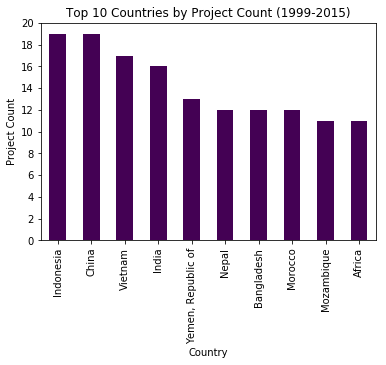

In [76]:
q1_plot = top10pjt.plot(
    kind='bar',\
    title = 'Top 10 Countries by Project Count (1999-2015)',\
    yticks = list(range(0,22,2)),\
    colormap ='viridis',\
    legend = False
)
q1_plot.set_xlabel('Country')
q1_plot.set_ylabel('Project Count')
plt.show()

**Question 2: Find the top 10 major project themes (using column 'mjtheme_namecode')**

In [136]:
from collections import Counter
df.mjtheme_namecode.head(10)

0    [{'code': '8', 'name': 'Human development'}, {...
1    [{'code': '1', 'name': 'Economic management'},...
2    [{'code': '5', 'name': 'Trade and integration'...
3    [{'code': '7', 'name': 'Social dev/gender/incl...
4    [{'code': '5', 'name': 'Trade and integration'...
5    [{'code': '6', 'name': 'Social protection and ...
6    [{'code': '2', 'name': 'Public sector governan...
7    [{'code': '11', 'name': 'Environment and natur...
8    [{'code': '10', 'name': 'Rural development'}, ...
9    [{'code': '2', 'name': 'Public sector governan...
Name: mjtheme_namecode, dtype: object

In [155]:
# with Counter method
tcount.clear()
tlist = []
for row in df.mjtheme_namecode:
    for d in row:
        tlist.append(d['code']+ ' - '+d['name'])
tcount = Counter(tlist)
tcount.most_common(10)

[('11 - Environment and natural resources management', 223),
 ('10 - Rural development', 202),
 ('8 - Human development', 197),
 ('2 - Public sector governance', 184),
 ('6 - Social protection and risk management', 158),
 ('4 - Financial and private sector development', 130),
 ('7 - Social dev/gender/inclusion', 119),
 ('5 - Trade and integration', 72),
 ('9 - Urban development', 47),
 ('1 - Economic management', 33)]

In [179]:
#with dict counter method
tdict = {}
for row in df.mjtheme_namecode:
    for d in row:
        if str(d['code']+'-'+d['name']) in tdict.keys():
            tdict[str(d['code']+'-'+d['name'])] +=1
        else:
            tdict[str(d['code']+'-'+d['name'])] = 1
tdf = pd.DataFrame.from_dict(tdict, orient = 'index').sort_values(by = [0], ascending = False)
tdf.columns = ['Count']
tdf

,Count
11-Environment and natural resources management,223
10-Rural development,202
8-Human development,197
2-Public sector governance,184
6-Social protection and risk management,158
4-Financial and private sector development,130
7-Social dev/gender/inclusion,119
5-Trade and integration,72
9-Urban development,47
1-Economic management,33


**Question 3: In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.**

In [220]:
codes = list(range(1,12))
codes = [str(i) for i in codes]
codenames = ['Economic management',\
             'Public sector governance',\
             'Rule of law',\
             'Financial and private sector development',\
             'Trade and integration',\
             'Social protection and risk management',\
             'Human development',\
             'Social dev/gender/inclusion',\
             'Urban development',\
             'Rural development',\
             'Environment and natural resources management'
            ]
z = zip(codes,codenames)
ref_dict = dict(z)
print(ref_dict)  

{'1': 'Economic management', '2': 'Public sector governance', '3': 'Rule of law', '4': 'Financial and private sector development', '5': 'Trade and integration', '6': 'Social protection and risk management', '7': 'Human development', '8': 'Social dev/gender/inclusion', '9': 'Urban development', '10': 'Rural development', '11': 'Environment and natural resources management'}


In [225]:
for row in df.mjtheme_namecode:
    for d in row:
        if d['name'] == '':
            d['name'] = ref_dict[d['code']]

# recomputing top project themes with Counter method
tcount.clear()
tlist = []
for row in df.mjtheme_namecode:
    for d in row:
        tlist.append(d['code']+ ' - '+d['name'])
tcount = Counter(tlist)
tcount.most_common(20)

[('11 - Environment and natural resources management', 250),
 ('10 - Rural development', 216),
 ('2 - Public sector governance', 199),
 ('8 - Human development', 197),
 ('6 - Social protection and risk management', 168),
 ('4 - Financial and private sector development', 146),
 ('7 - Social dev/gender/inclusion', 119),
 ('5 - Trade and integration', 77),
 ('9 - Urban development', 50),
 ('1 - Economic management', 38),
 ('3 - Rule of law', 15),
 ('8 - Social dev/gender/inclusion', 13),
 ('7 - Human development', 11)]